In [1]:
from netpred.analysis import *
from netpred.data import ProteinDataLoader
import seaborn as sns
import matplotlib.pyplot as plot
from captum.attr import *

2022-04-10 15:49:05 Decompressing full_protein_dssp_annotations.json.gz
2022-04-10 15:49:06 Decompressing single_domain_dssp_annotations.json.gz
2022-04-10 15:49:13 Parsing casp11/validation...


NetPred(
  (prediction): PredictionNetwork(
    (stack): Sequential(
      (0): Linear(in_features=324, out_features=243, bias=True)
      (1): ReLU()
      (2): Linear(in_features=243, out_features=81, bias=True)
    )
  )
  (relu): ReLU()
  (filtering): FilteringNetwork(
    (stack): Sequential(
      (0): Linear(in_features=81, out_features=81, bias=True)
      (1): ReLU()
      (2): Linear(in_features=81, out_features=3, bias=True)
    )
  )
)


2022-04-10 15:49:13 Loaded 223 sequences from casp11/validation.
2022-04-10 15:49:13 Creating windows for casp11/validation ...
2022-04-10 15:49:13 Windowing complete for casp11/validation (created 48979 windows).


In [2]:
ig = IntegratedGradients(net)

test_loader = ProteinDataLoader('validation', batch_size=512)

2022-04-10 15:49:14 Parsing casp11/validation...
2022-04-10 15:49:14 Loaded 223 sequences from casp11/validation.
2022-04-10 15:49:14 Creating windows for casp11/validation ...
2022-04-10 15:49:15 Windowing complete for casp11/validation (created 48979 windows).


In [3]:
features_ = []
results = []
labels = []
for features, target in test_loader:
    labels.append(target)
    attr = fa.attribute(features, target=target)
    results.append(attr.numpy())
    features_.append(features.numpy())

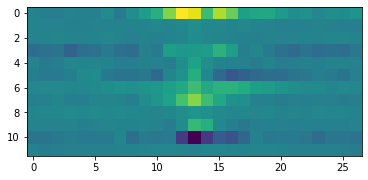

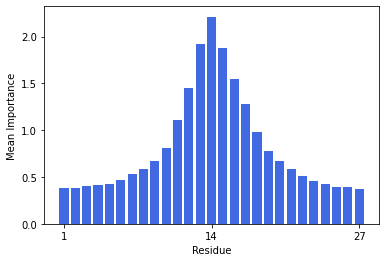

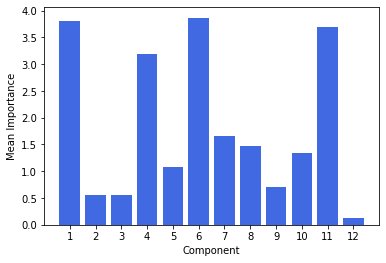

In [4]:
a = np.concatenate(results)

averaged = np.mean(a, axis=0)
averaged_abs = np.mean(np.abs(a), axis=0)

plot.imshow(averaged)
plot.show()

ax = plot.bar(range(WINDOW_SIZE), averaged_abs.sum(axis=0), color='royalblue')
plot.xlabel('Residue')
plot.ylabel('Mean Importance')
plot.xticks(np.arange(0, WINDOW_SIZE, WINDOW_CENTRE), np.arange(0, WINDOW_SIZE, WINDOW_CENTRE) + 1)
plot.savefig('residue_importance.pdf')
plot.show()

ax = plot.bar(range(PSSM_ROWS), averaged_abs.sum(axis=1), color='royalblue')
plot.xlabel('Component')
plot.ylabel('Mean Importance')
plot.xticks(range(PSSM_ROWS), np.arange(PSSM_ROWS) + 1)
plot.savefig('component_importance.pdf')
plot.show()


In [5]:
per_class = {0: [], 1: [], 2: []}
features_per_class = {0: [], 1: [], 2: []}

for j in range(len(labels)-1):
    for i in range(BATCH_SIZE):
        label = labels[j][i].item()
        per_class[label].append(results[j][i])
        features_per_class[label].append(features_[j][i])
#         plot.imshow(results[j][i])
#         plot.show()

torch.Size([12, 27])
torch.Size([1, 324])


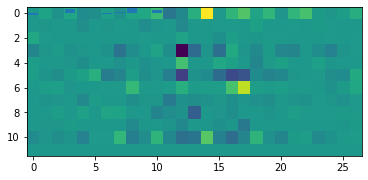

In [6]:
for features, target in test_loader:
    break

print(features[375].shape)
attr = ig.attribute(features[375].reshape(1, 324), target=target[375])
print(attr.shape)
plot.bar(range(PSSM_ROWS), attr.reshape(12, 27)[:, WINDOW_CENTRE])
plot.imshow(attr.reshape(12, 27))

(12, 27)
-0.016340127


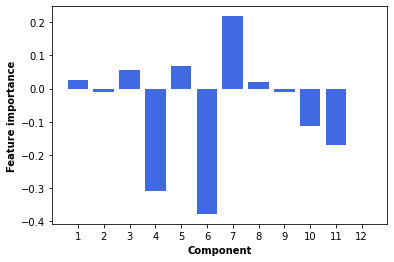

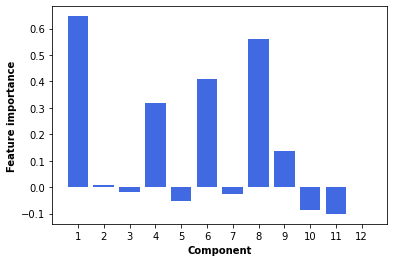

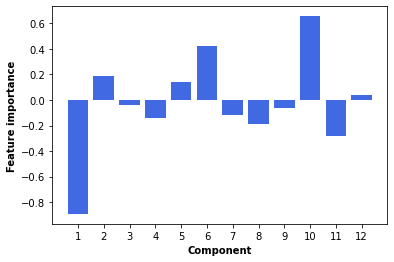

In [7]:
averaged = np.mean(per_class[0], axis=0) # np.sum(per_class[0], axis=0)
print(averaged.shape)
# plot.imshow(averaged)
# plt.yticks(range(PSSM_ROWS), np.arange(PSSM_ROWS) + 1)
# # plot.show()
print(averaged[-1, :WINDOW_CENTRE].sum())
plot.bar(range(PSSM_ROWS), averaged[:, WINDOW_CENTRE], color='royalblue')  # averaged.sum(axis=1)
plot.xlabel('Component', weight='bold')
plot.ylabel('Feature importance', weight='bold')
plot.xticks(range(PSSM_ROWS), np.arange(PSSM_ROWS) + 1)
plot.savefig('helix_importance.pdf')
plot.show()

averaged = np.mean(per_class[1], axis=0)
# # plot.imshow(averaged)
# plt.yticks(range(PSSM_ROWS), np.arange(PSSM_ROWS) + 1)
# plot.show()
plot.bar(range(PSSM_ROWS), averaged[:, WINDOW_CENTRE], color='royalblue')
plot.xlabel('Component', weight='bold')
plot.ylabel('Feature importance', weight='bold')
plot.xticks(range(PSSM_ROWS), np.arange(PSSM_ROWS) + 1)
plot.savefig('strand_importance.pdf')
plot.show()


averaged = np.mean(per_class[2], axis=0)
# plot.imshow(averaged)
# plt.yticks(range(PSSM_ROWS), np.arange(PSSM_ROWS) + 1)
# plot.show()

plot.bar(range(PSSM_ROWS), averaged.sum(axis=1), color='royalblue')
plot.xlabel('Component', weight='bold')
plot.ylabel('Feature importance', weight='bold')
plot.xticks(range(PSSM_ROWS), np.arange(PSSM_ROWS) + 1)
plot.savefig('loop_importance.pdf')
plot.show()


# 1 Hydrophobic 2 Positive 3 Negative 4 Polar 5 Charged 6 Small 7 Tiny 8 Aliphatic 9 Aromatic 10 Proline

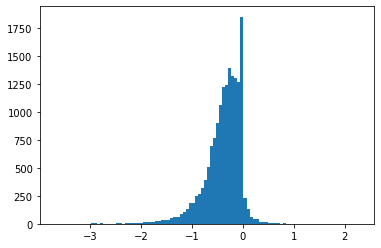

In [10]:
# for c in range(0, 90, 1):
# # for alpha in features_per_class[0][:90:3]:
#     alpha = features_per_class[0][c]
#     attr = per_class[0][c]
# #     print(alpha.sum(axis=0).shape)
# #     plot.bar(range(WINDOW_SIZE), alpha.sum(axis=0)[-1])
# #     plot.bar(range(WINDOW_SIZE), attr[4])
#     plot.imshow(np.abs(alpha))
#     plot.show()

# plot.hist(np.array(per_class[0])[:, 0, WINDOW_CENTRE], 100)
# plot.show()
# plot.hist(np.array(per_class[0])[:, 1, WINDOW_CENTRE], 100)
# plot.show()

plot.hist(np.array(per_class[0])[:, 5, WINDOW_CENTRE], 100)

# alphas = per_class[0]

# for i in range(12):
#     print(i)
#     plot.hist(np.array(per_class[0][i])[0, .mean(axis=1), 100)
#     plot.show()
plot.show()

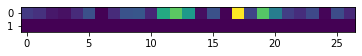

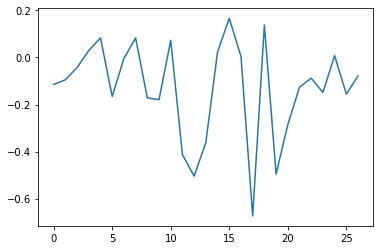

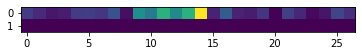

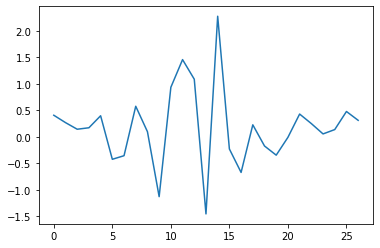

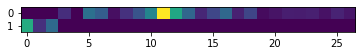

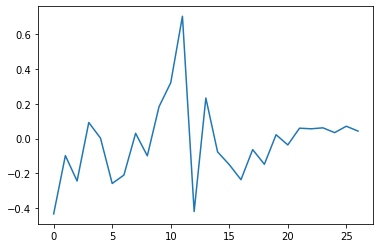

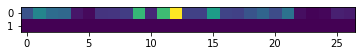

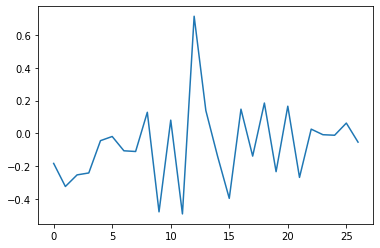

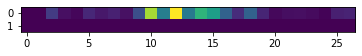

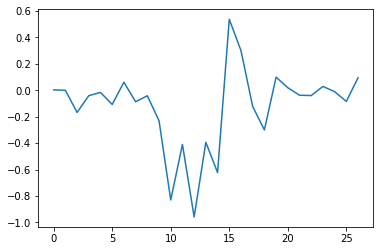

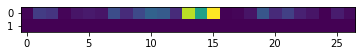

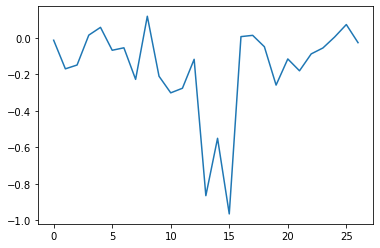

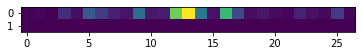

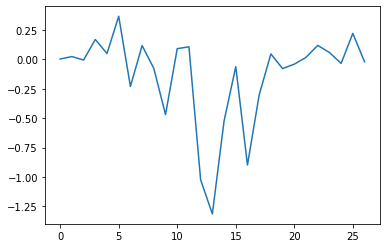

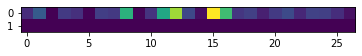

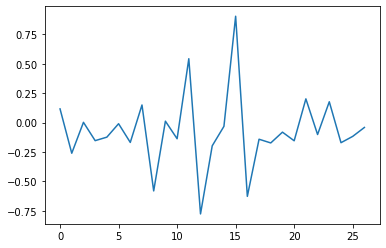

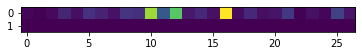

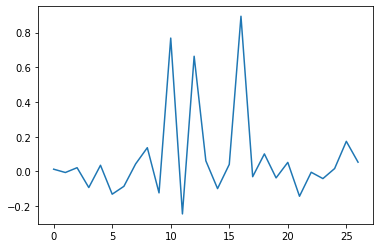

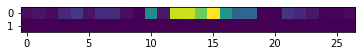

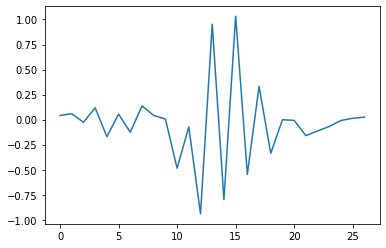

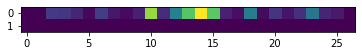

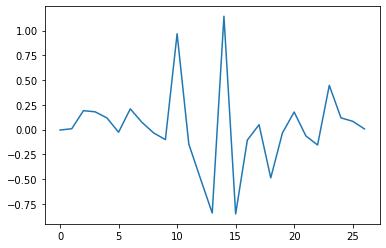

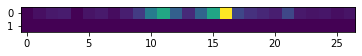

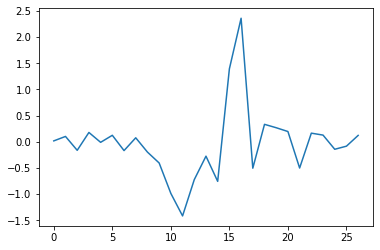

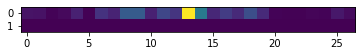

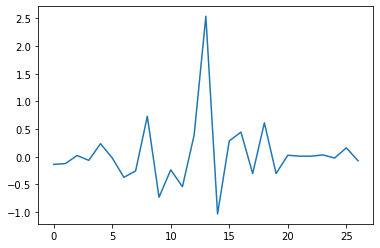

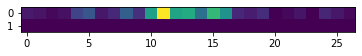

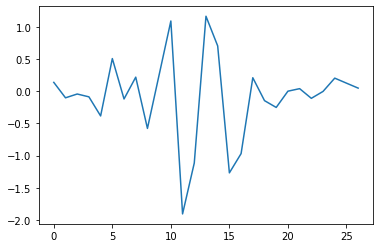

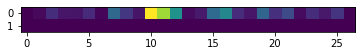

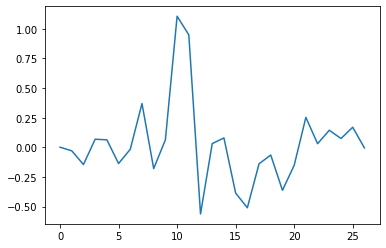

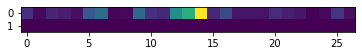

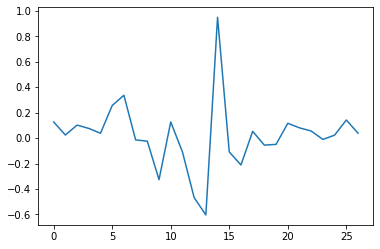

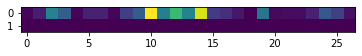

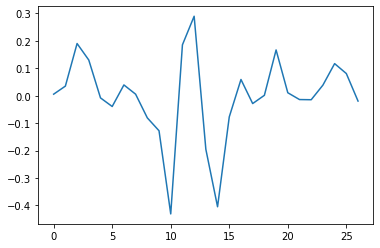

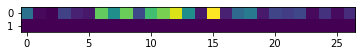

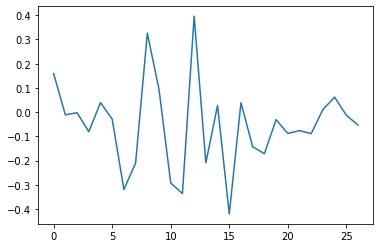

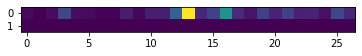

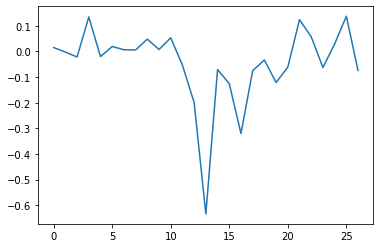

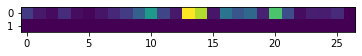

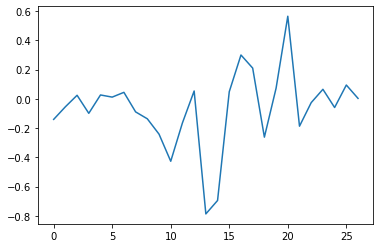

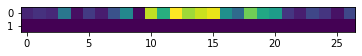

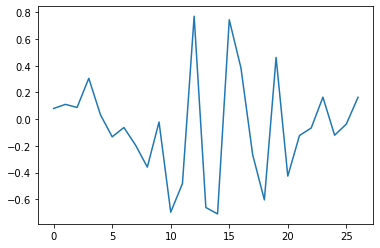

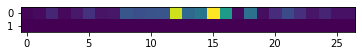

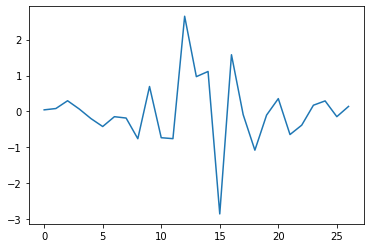

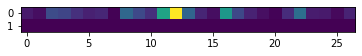

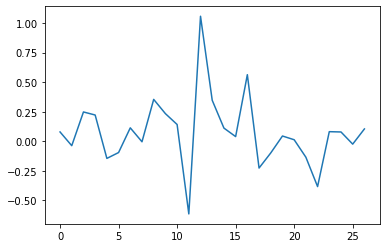

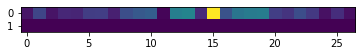

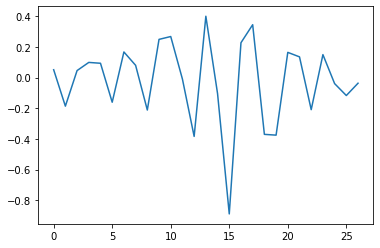

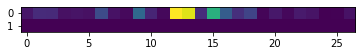

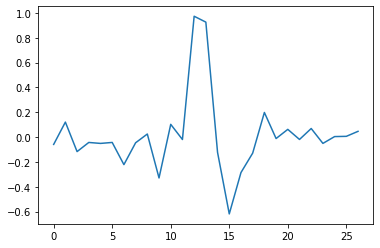

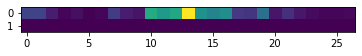

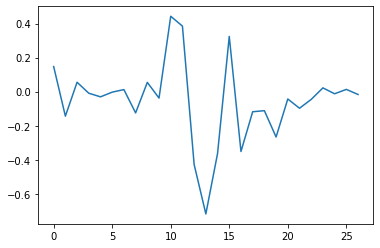

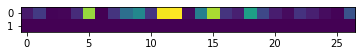

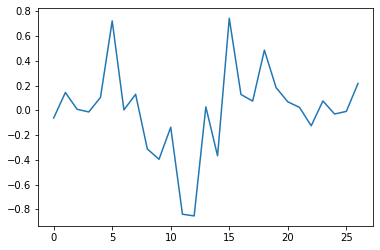

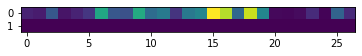

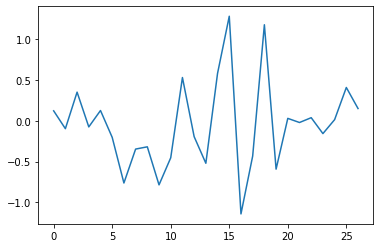

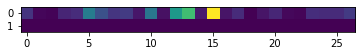

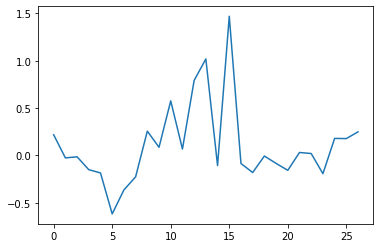

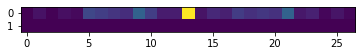

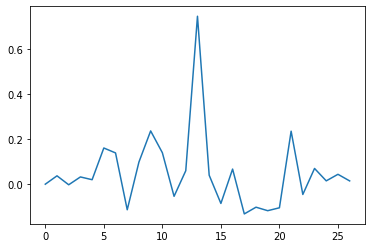

0


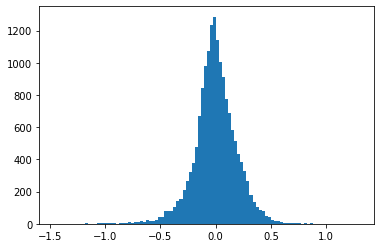

1


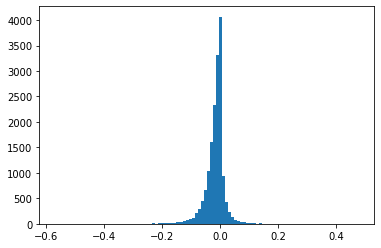

2


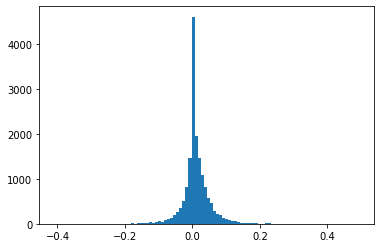

3


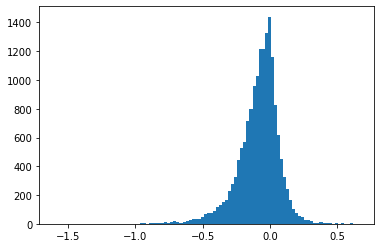

4


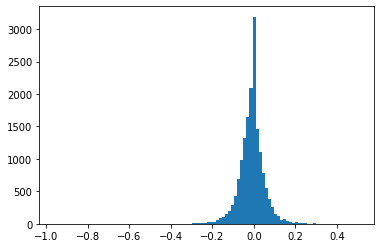

5


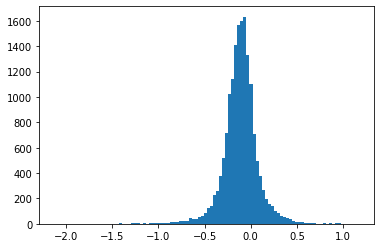

6


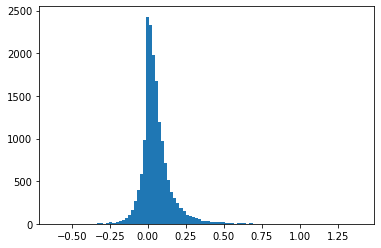

7


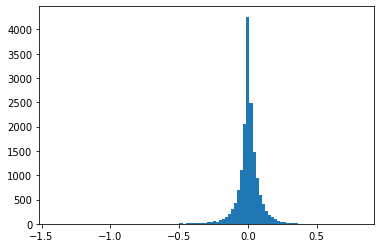

8


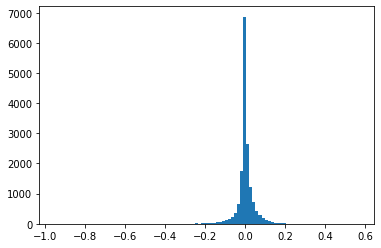

9


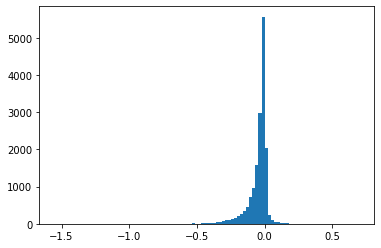

10


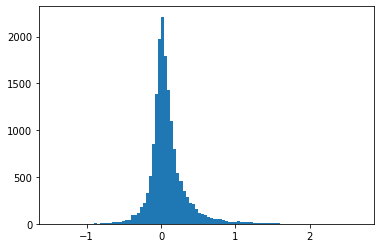

11


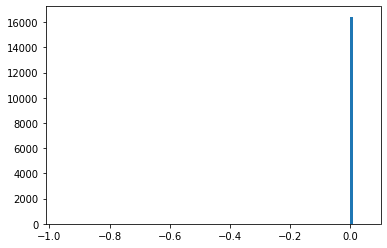

In [11]:
# for c in range(0, 90, 3):
# # for alpha in features_per_class[0][:90:3]:
#     alpha = features_per_class[1][c]
#     attr = per_class[1][c]
# #     print(alpha.sum(axis=0).shape)
# #     plot.bar(range(WINDOW_SIZE), alpha.sum(axis=0)[-1])
# #     plot.bar(range(WINDOW_SIZE), attr[4])
#     plot.imshow(np.abs(attr[10:15]))
#     plot.show()
#     plot.plot(range(WINDOW_SIZE), attr[10:15].sum(axis=0))
#     plot.show()

# # plot.hist(np.array(per_class[0])[:, 0, WINDOW_CENTRE], 100)
# # plot.show()
# # plot.hist(np.array(per_class[0])[:, 1, WINDOW_CENTRE], 100)
# # plot.show()
# for i in range(12):
#     print(i)
#     plot.hist(np.array(per_class[0])[:, i, 9:12].mean(axis=1), 100)
#     plot.show()